# Machine Learning Module

Generate data

(40, 2)
(40,)


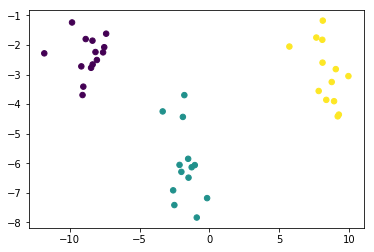

In [22]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x, y = datasets.make_blobs(n_samples= 40, 
                           centers= 3, 
                           n_features =2, 
                           cluster_std= 1.0, 
                           center_box=(-10.0, 10.0), 
                           shuffle= True, 
                           random_state= None)

print(np.shape(x))
print(np.shape(y))
plt.scatter(x[:,0],x[:,1], 30, y)

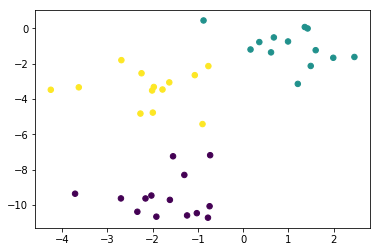

In [33]:
""
xb, yb = datasets.make_blobs(n_samples= 40, 
                           centers= 3, 
                           n_features =2, 
                           cluster_std= 1.0, 
                           center_box=(-10.0, 10.0), 
                           shuffle= True, 
                           random_state= 2)

plt.scatter(xb[:,0],xb[:,1], 30, yb)

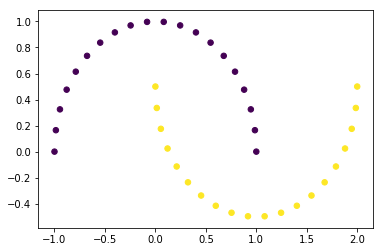

In [38]:
xm, ym = datasets.make_moons(n_samples= 40, 
                            shuffle= True, 
                            noise= None,
                            random_state= None)


plt.scatter(xm[:,0],xm[:,1], 30, ym)

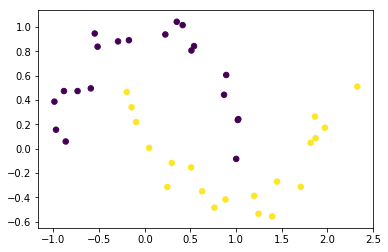

In [44]:
xn, yn = datasets.make_moons(n_samples= 40, 
                            shuffle= True, 
                            noise= .1,
                            random_state= None)


plt.scatter(xn[:,0],xn[:,1], 30, yn)

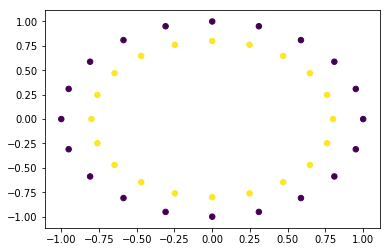

In [46]:
xc, yc = datasets.make_circles(n_samples= 40, 
                            shuffle= True, 
                            noise= None,
                            random_state= None,
                            factor= 0.8)


plt.scatter(xc[:,0],xc[:,1], 30, yc)

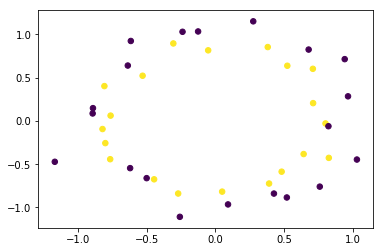

In [47]:
xc, yc = datasets.make_circles(n_samples= 40, 
                            shuffle= True, 
                            noise= .1,
                            random_state= None,
                            factor= 0.8)


plt.scatter(xc[:,0],xc[:,1], 30, yc)

Suppose we have three points P1=[1, 2],  P2=[1.75, 3],  and P3=[1, 3.5], and we want to know the nearest point to point P1.  To do that, one idea is to compute the distance between P1 to the other two points and choose the one with the smallest distance. Another idea is to compute the similarity between P1 and the other two points and select the most similar one.  Write a python code to determine which of these two points P2 and P3 are the most similar to P1 and located near it. For similarity use Cosine similarity metric and for distance use Euclidean distance. Both formulas are given below

In [60]:
import sklearn.metrics.pairwise as pw

p1=np.array([1,2])
p2=np.array([1.75, 3])
p3=np.array([1,3.5])

#euclidean_distances is the distance of the euclidian
d1= pw.euclidean_distances(p1.reshape(-1,2), p2.reshape(-1,2)) [0]
d2= pw.euclidean_distances(p1.reshape(-1,2), p3.reshape(-1,2)) [0]

if d1<d2:
  print('P2 is closer to P1: {}'.format(d1))

else:
  print('P3 is closer to P1: {}'. format(d2))

P2 is closer to P1: [1.25]


In [61]:
#manhattan_distances is the city block method
d1= pw.manhattan_distances(p1.reshape(-1,2), p2.reshape(-1,2)) [0]
d2= pw.manhattan_distances(p1.reshape(-1,2), p3.reshape(-1,2)) [0]

if d1<d2:
  print('P2 is closer to P1: {}'.format(d1))

else:
  print('P3 is closer to P1: {}'. format(d2))

P3 is closer to P1: [1.5]


Evaluation External Index]
Generate two clusters using make_blobs function that can be found in the following package


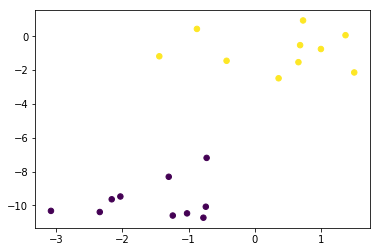

In [78]:
# Silhouette

from sklearn.datasets.samples_generator import make_blobs
x, y = datasets.make_blobs(n_samples= 20, 
                           centers= 2, 
                           n_features =2, 
                           cluster_std= 1, 
                           random_state= 2)

plt.scatter(x[:,0],x[:,1], 30, y)


In [79]:
mask = np.random.randint(0,2,size=y.shape).astype(np.bool)
change = np.ones(y.shape)
yhat= np.copy(y)
yhat[mask]= change[mask]
print("y",y)
print("yhat",yhat)



y [0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0]
yhat [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1]


In [85]:
from sklearn.metrics import silhouette_score,jaccard_score,jaccard_similarity_score, adjusted_rand_score 
print('silhouette',silhouette_score(x,yhat))

print('Jaccard', jaccard_score(y,yhat))

print('jaccard sim', jaccard_similarity_score(y,yhat))


print('ARI',adjusted_rand_score(y,yhat))

Jaccard 0.7142857142857143
jaccard sim 0.8
ARI 0.3303964757709251


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Use the same created dataset X and the clustering results y ̂ to compute the following metrics
	Within Sum of Squares (WSS) also called inertia
	Between Sum of Squares (BSS)
	Silhouette index 


In [100]:

print('silhouette',silhouette_score(x,yhat))


c1=x[y==1,:]
c2=x[y==0,:]

m1=c1.mean()

m2=c2.mean()

m=x.mean()

l1= len(c1)
l2= len(c2)


print('WSS',(((x-m1)**2)+((x-m2)**2)).sum())

print('BSS',(l1*((m-m1)**2))+ (l2*((m-m2)**2)))
 

silhouette 0.37321553523751405
WSS 1913.8006230150766
BSS 144.4875609033959


#K-means

Using KMeans from Scikit learn, create an instance of the model. Specify the following parameters:
-	n_clusters =2
-	init="k-means++"

and perform clustering on the above created dataset. Finally, use scatter plot to show clustering results. 

(20,)

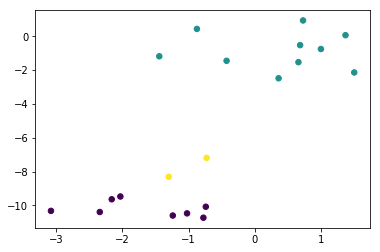

In [109]:
from sklearn.cluster import KMeans

n_clusters =3

kmeans= KMeans(n_clusters,
              init='k-means++',
              n_init=10,
              max_iter=300,
              tol=1e-4,
              verbose=0,
              random_state=None,
              algorithm='auto')

kmeans.fit(x)
y_pred =kmeans.predict(x)

plt.figure()
plt.scatter(x[:,0],x[:,1],30,y_pred)




Question 6 [Determine value for K (elbow method)]
Elbow method is used to determine the right number of clusters for a given dataset. The turning point ( that forms an elbow shape) should be used as K values. The following Figure shows a curve with an elbow shape. 

Given the data used in Question 3, write a python code that performs kmeans clustering of the data for several iterations with different K each time. Compute the WSS (inertia) in each iteration. Then, plot the curve with number of clusters at the horizontal access, while the inertia in the vertical axis. 


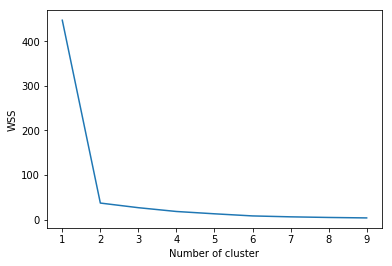

In [128]:
kk=range(1, 10)
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x)
    sse.append(kmeans.inertia_)
    
    
plt.figure()
plt.plot(kk, sse)
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [0]:
""